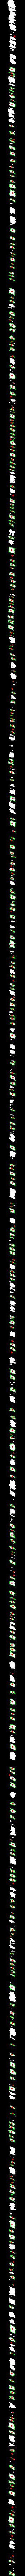

Total angled lines detected: 354


In [ ]:
import tifffile
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image and preprocess
img = tifffile.imread('mouse420-ls-027_Cycle00001_Ch2_000001.ome.tif')
slice_img = img[0]
x_start, x_end = 280, 350
cropped = slice_img[:, x_start:x_end]

# Preprocessing to enhance white lines
blurred = cv2.blur(cropped, (5, 3))
homogenized = np.where(blurred > 180, 255, 0).astype(np.uint8)
blurred1 = cv2.blur(homogenized, (3, 2))
homogenized1 = np.where(blurred1 > 190, 255, 0).astype(np.uint8)
blurred2 = cv2.blur(homogenized1, (1, 1))
# adaptive = cv2.adaptiveThreshold(
#     homogenized2 , 255,
#     cv2.ADAPTIVE_THRESH_MEAN_C,  # or cv2.ADAPTIVE_THRESH_GAUSSIAN_C
#     cv2.THRESH_BINARY,
#     blockSize=3,  # size of neighborhood
#     C=5           # constant subtracted from the mean
# )
binary = np.where(blurred2  > 220, 255, 0).astype(np.uint8)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by angle
angled_lines = []
output = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

for cnt in contours:
    if len(cnt) >= 4:
        # Fit minimum area rectangle
        rect = cv2.minAreaRect(cnt)
        (cx, cy), (w, h), angle = rect

        angle = abs(angle)
        if w < h:
            angle = 90 - angle

        # Count and draw only if it's angled
        if 0 < angle < 80:
            angled_lines.append(cnt)
            cv2.drawContours(output, [cnt], -1, (0, 255, 0), 1)  # Draw contour
            cv2.circle(output, (int(cx), int(cy)), 2, (0, 0, 255), -1)  # Draw center marker

# Show and print results
cv2_imshow(output)
print(f"Total angled lines detected: {len(angled_lines)}")
